In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

%matplotlib inline

In [3]:
user = pd.read_csv('user_table.csv', parse_dates=['signup_date'])
user.head()

,user_id,signup_date
0,34,2015-01-01
1,59,2015-01-01
2,178,2015-01-01
3,285,2015-01-01
4,383,2015-01-01


In [4]:
test = pd.read_csv('test_table.csv', parse_dates=['date'])
test.head()

,user_id,date,browser,test,pages_visited
0,600597,2015-08-13,IE,0,2
1,4410028,2015-08-26,Chrome,1,5
2,6004777,2015-08-17,Chrome,0,8
3,5990330,2015-08-27,Safari,0,8
4,3622310,2015-08-07,Firefox,0,1


In [5]:
data = pd.merge(left=user, right=test, on='user_id', how='left')
data.head()

,user_id,signup_date,date,browser,test,pages_visited
0,34,2015-01-01,2015-08-15,Chrome,0,6
1,59,2015-01-01,2015-08-12,Chrome,1,6
2,178,2015-01-01,2015-08-10,Safari,1,3
3,285,2015-01-01,2015-08-03,Opera,0,5
4,383,2015-01-01,2015-08-05,Firefox,1,9


In [6]:
data.groupby('test')['pages_visited'].mean()

test
0    4.608394
1    4.599693
Name: pages_visited, dtype: float64

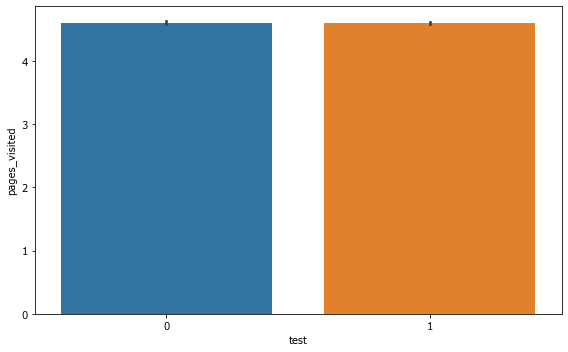

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='test', y='pages_visited', data=data, ax=ax)
plt.tight_layout()
plt.show()

In [10]:
# perform t-test
control_page = data[data['test']==0]['pages_visited'].values
experiment_page = data[data['test']==1]['pages_visited'].values
ttest_ind(a=control_page, b=experiment_page, equal_var=False)

Ttest_indResult(statistic=0.5571118435554797, pvalue=0.5774523171559118)

Cannot reject the null hypothesis that there is no difference between control and experiment group.
The test doesn't win and shouldn't expand to all users.

In [11]:
data['interval'] = (data['date'] - data['signup_date']).apply(lambda x: x.days)
data['is_first'] = (data['interval'] == 0).astype(int)
data['dayofweek'] = data['date'].apply(lambda x: x.dayofweek)
data.head()

,user_id,signup_date,date,browser,test,pages_visited,interval,is_first,dayofweek
0,34,2015-01-01,2015-08-15,Chrome,0,6,226,0,5
1,59,2015-01-01,2015-08-12,Chrome,1,6,223,0,2
2,178,2015-01-01,2015-08-10,Safari,1,3,221,0,0
3,285,2015-01-01,2015-08-03,Opera,0,5,214,0,0
4,383,2015-01-01,2015-08-05,Firefox,1,9,216,0,2


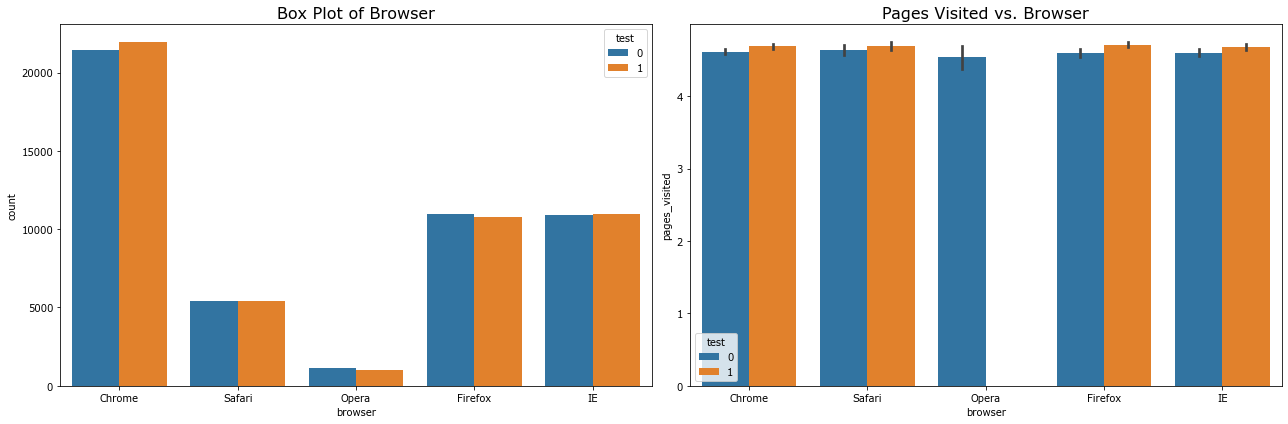

In [14]:
# segmentation by browser
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(x='browser', hue='test', data=data, ax=ax[0])
ax[0].set_title('Box Plot of Browser', fontsize=16)

sns.barplot(x='browser', y='pages_visited', hue='test', data=data, ax=ax[1])
ax[1].set_title('Pages Visited vs. Browser', fontsize=16)
plt.tight_layout()
plt.show()

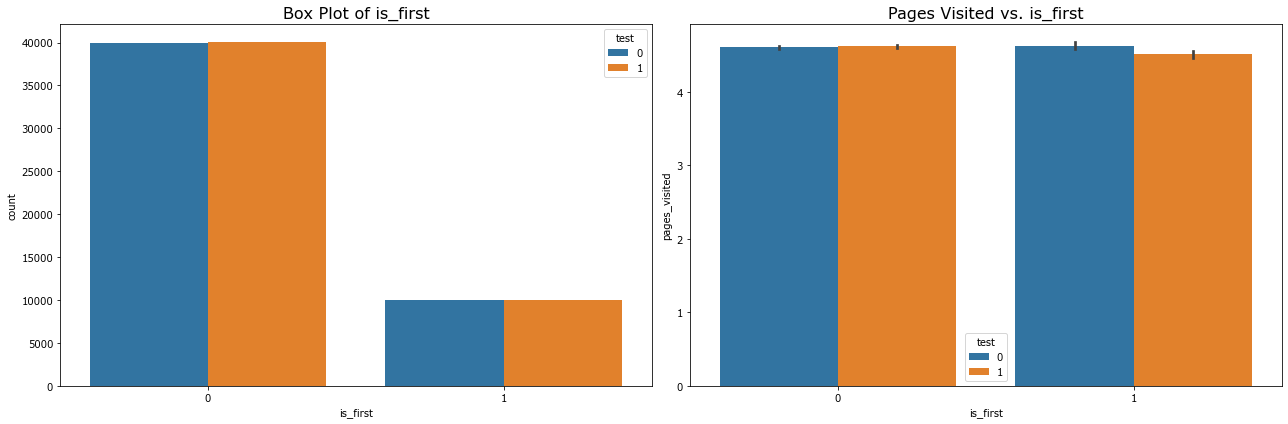

In [16]:
# segmentation by is_first
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(x='is_first', hue='test', data=data, ax=ax[0])
ax[0].set_title('Box Plot of is_first', fontsize=16)

sns.barplot(x='is_first', y='pages_visited', hue='test', data=data, ax=ax[1])
ax[1].set_title('Pages Visited vs. is_first', fontsize=16)
plt.tight_layout()
plt.show()

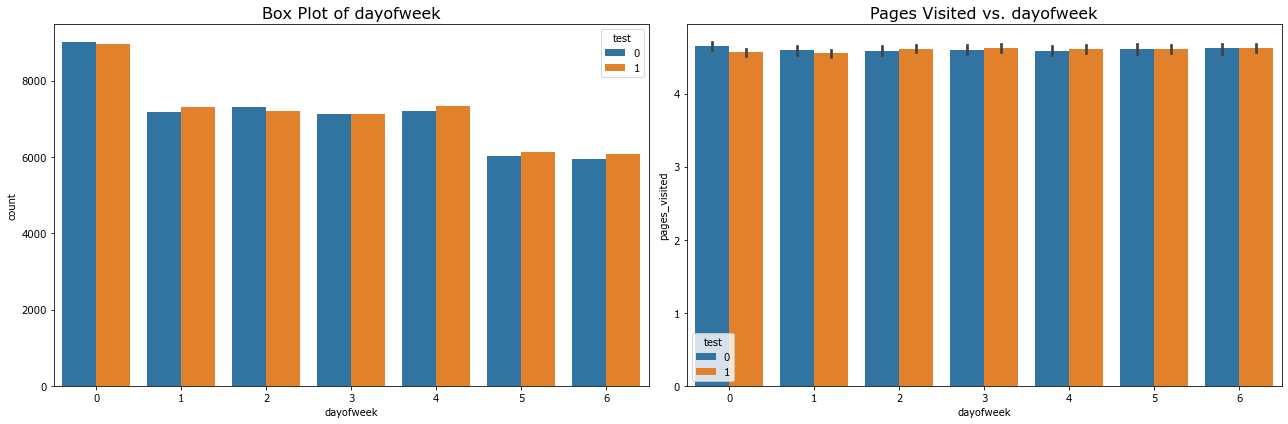

In [17]:
# segmentation by dayofweek
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(x='dayofweek', hue='test', data=data, ax=ax[0])
ax[0].set_title('Box Plot of dayofweek', fontsize=16)

sns.barplot(x='dayofweek', y='pages_visited', hue='test', data=data, ax=ax[1])
ax[1].set_title('Pages Visited vs. dayofweek', fontsize=16)
plt.tight_layout()
plt.show()

In [18]:
# Remove the user who use Opera and conduct t-test again
subset = data[data['browser'] != 'Opera']
subset.groupby('test')['pages_visited'].mean()

test
0    4.609804
1    4.694989
Name: pages_visited, dtype: float64

In [19]:
control_page = subset[subset['test']==0]['pages_visited'].values
experiment_page = subset[subset['test']==1]['pages_visited'].values
ttest_ind(a=control_page, b=experiment_page, equal_var=False)

Ttest_indResult(statistic=-5.474295518566027, pvalue=4.403954129457701e-08)

The new feature becomes signifcantly useful after removing records with Opera.